# AI Task

Objective:
Write your own Principle Component Analysis(PCA).
What do I mean?
Take the MNIST dataset.  
Do all the required pre-processing.
Write your own PCA algorithm (Do not use any inbuilt library implementation but you can use numpy and pandas ).
Reduce the dimensionality to 2.
Visualize the reduced dimensionality using matplotlib
What do I expect?
Clear code
Clear comments
Ability to explain the code that you have written 

## Load MNIST Data 

In [3]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Reading file into the dataframe using pandas.
   
df = pd.read_csv('./mnist_train.csv')

print(df.head(5)) # print first five rows of df.

# save the labels into a variable l.
l = df['label']

# Drop the label feature and store the pixel data in d.
d = df.drop("label",axis=1)


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [2]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


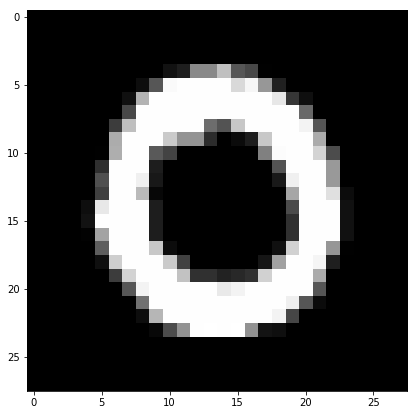

0


In [4]:
# display or plot a number.
# Cheaking our data.
plt.figure(figsize=(7,7))
idx = 1

grid_data = np.array(d.iloc[idx]).reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

In [5]:
# checking the shape of the dataframe

print("the shape of data = ", d.shape)
print("the shape of label data = ", l.shape)


the shape of data =  (42000, 784)
the shape of label data =  (42000,)


## Data-preprocessing 

In [33]:
# Data-preprocessing: Standardizing the data
from numpy import mean
M = mean(d, axis=0)
#print(M)
#center columns by subtracting column means
C = d - M
#print(C)
C.shape

(42000, 784)

## Eigen Values and Eigen Vectors from Covariance matrix

In [12]:
#find the co-variance matrix which is : A^T * A
from numpy import cov
covar_matrix = cov(C.T)
print ( "The shape of covariance matrix = ", covar_matrix.shape)


The shape of covariance matrix =  (784, 784)


In [13]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.
import numpy as np
from numpy.linalg import eig
#this code gives eigen values and corresponding eigen vectors in order.
values, vectors = np.linalg.eig(covar_matrix) 
#this code copies only the top 2 eigen vectors
vectors = vectors[:,[0,1]]
print("Shape of eigen vectors = ",vectors.shape)
vectors = vectors.T
print("Updated Shape of eigen vectors = ",vectors.shape)

Shape of eigen vectors =  (784, 2)
Updated Shape of eigen vectors =  (2, 784)


In [14]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.dot(vectors, C.T)

print (" resultanat new data points' shape ", vectors.shape, "X", C.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 42000)  =  (2, 42000)


In [15]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, l)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("First_principal", "Second_principal", "label"))
print(dataframe.head())


   First_principal  Second_principal  label
0      -661.595780       -699.311328    1.0
1      1701.451685       -360.551556    0.0
2      -886.894434       -293.765782    1.0
3      -165.755602        300.182761    4.0
4      1923.709716       -449.153069    0.0


## Visualization of reduced dimensionality using matplotlib

Without colormap


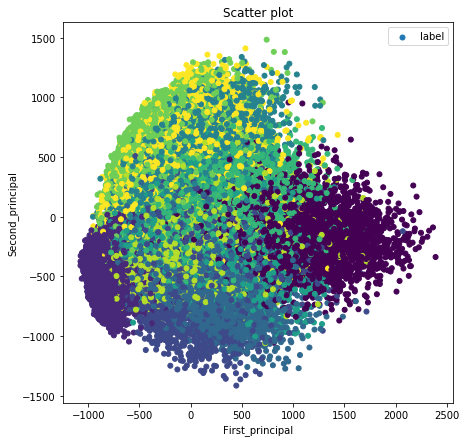

WIth colormap


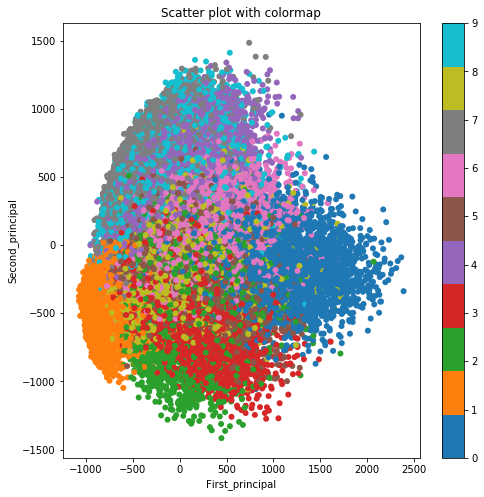

In [17]:
# plotting the 2d data points with matplotlib
fig = plt.figure(figsize=(7,7))
plt.scatter(dataframe.First_principal, dataframe.Second_principal, label= "label", marker= ".", s=100, c=dataframe.label)
plt.title('Scatter plot')
plt.xlabel('First_principal')
plt.ylabel('Second_principal')
plt.legend()
print ("Without colormap",)
plt.show()
# WIth colormap
print("WIth colormap",)
fig = plt.figure(figsize=(8,8))
plt.scatter(dataframe.First_principal, dataframe.Second_principal,
            c=dataframe.label, edgecolor='none', alpha=20,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('First_principal')
plt.ylabel('Second_principal')
plt.title('Scatter plot with colormap')
plt.colorbar();

seaborn visualization


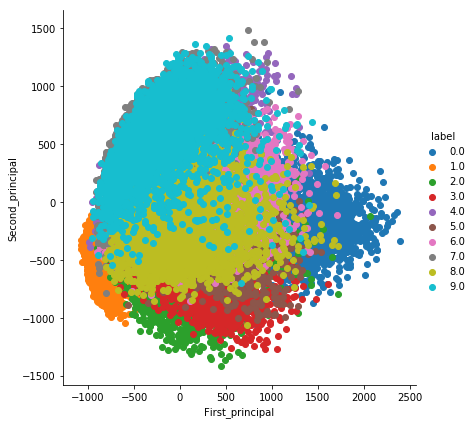

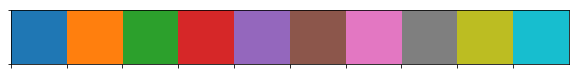

In [34]:
# ploting the 2d data points with seaborn
import seaborn as sn
print("seaborn visualization",)
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, 'First_principal', 'Second_principal').add_legend()
plt.show()
#showing the color palette used.
current_palette = sn.color_palette()
sn.palplot(current_palette)

# PCA using Scikit-Learn

In [27]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [28]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


In [29]:
# Data-preprocessing: Standardizing the data.
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)


C:\Users\Harshith nadendla\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Harshith nadendla\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(42000, 784)


In [30]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)



shape of pca_reduced.shape =  (42000, 2)


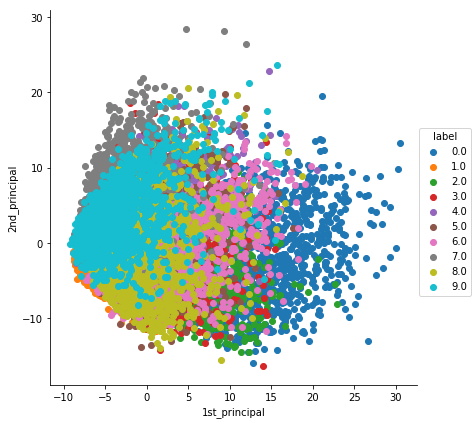

In [0]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("First_principal", "Second_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, 'First_principal', 'Second_principal').add_legend()
plt.show()

# PCA for dimensionality reduction (not for visualization)

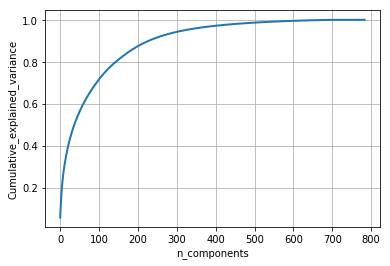

In [31]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(standardized_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.